<a href="https://colab.research.google.com/github/Bhakthipoorna/Deeplearning/blob/main/creating_ANN_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.2)

In [ ]:
#Now lets make the ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout  #Adding dropout layer is only when our model is underfit

In [ ]:
#Initialising the ANN
classifier=Sequential()

In [ ]:
#Addding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
#it will create a imput layer and first hidden layer
# input_dim=11 is the total  no. of input layer neurons(i.e. input features)
#units=6 is the 6 neurons in the 1st hidden layer 
#Kernal_initializer is the weight initialization technique

In [ ]:
#Addding 2nd input layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

In [ ]:
#Output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.add(Dropout(0.2))

In [ ]:
#Compiling the ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the ANN
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
134/134 [==============================] - 1s 4ms/step - loss: 1.1189 - accuracy: 0.4551 - val_loss: 0.6455 - val_accuracy: 0.8124
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 1.1841 - accuracy: 0.4542 - val_loss: 0.6099 - val_accuracy: 0.8124
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 1.2382 - accuracy: 0.5098 - val_loss: 0.5816 - val_accuracy: 0.8124
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 1.0451 - accuracy: 0.6502 - val_loss: 0.5623 - val_accuracy: 0.8124
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 1.0123 - accuracy: 0.7108 - val_loss: 0.5454 - val_accuracy: 0.8124
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 1.0475 - accuracy: 0.7370 - val_loss: 0.5331 - val_accuracy: 0.8124
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.7709 - val_loss: 0.5223 - val_accuracy: 0.8124

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

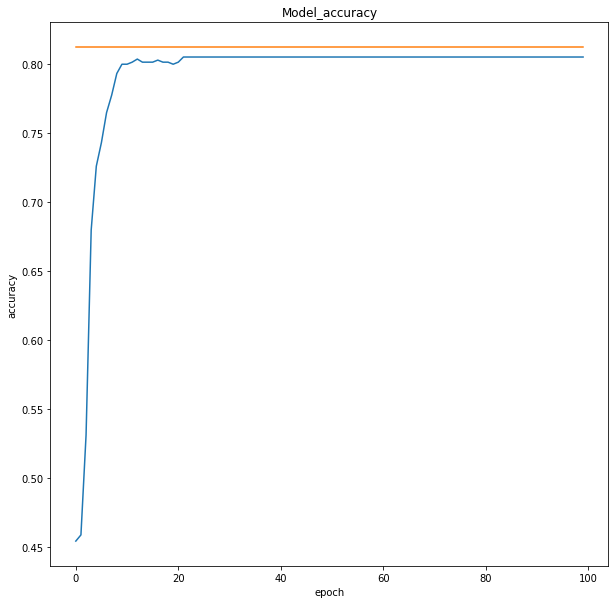

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

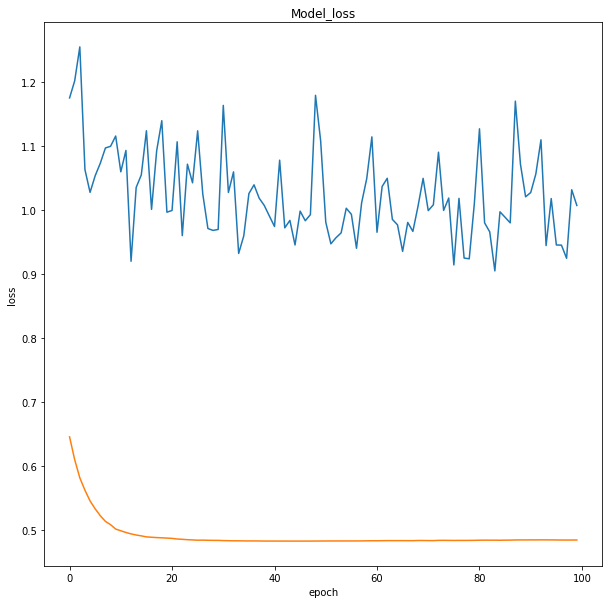

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[6348,    0],
       [1652,    0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7935